In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\6\data job posts.csv")
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [3]:
(data.jobpost[105])

'USAID, DCHA and LWVF\nTITLE:   Annual Program Statement: Implementation and Extension of\nWheelchair Services\nAPS No. M/OP/DCHA/DOFDA-03-1344\nDESCRIPTION:   The United States Government (USG), as represented by the\nUnited States Agency for International Development (USAID), Bureau for\nDemocracy Conflict and Humanitarian Assistance (DCHA), Leahy War Victims\nFund (LWVF) is seeking applications from US and non-US non-profit or\nfor-profit, nongovernmental organizations (NGOs), international\norganizations (IOs), and other qualified non-USG organizations (or\nconsortia) for the implementation and extension of wheelchair services\nfor civilian victims of war and other people with disabilities. This\nprogram is authorized in accordance with the Foreign Assistance Act of\n1961, as amended. Awards shall be made in accordance with 22 CFR 266,\nOMB Circulars A-21 (for universities) or A-122 (for non-profit\norganizations), ADS 303 and USAID Standard Provisions. \nFor more than a decade, th

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

#### Data Exploration

In [162]:
post_over_years = data.groupby(["Year"])[["jobpost"]].count()

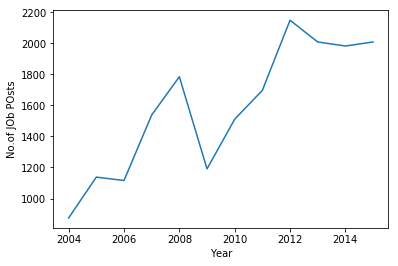

In [163]:
plt.plot(post_over_years)
plt.xlabel("Year")
plt.ylabel("No.of JOb POsts")
plt.show()

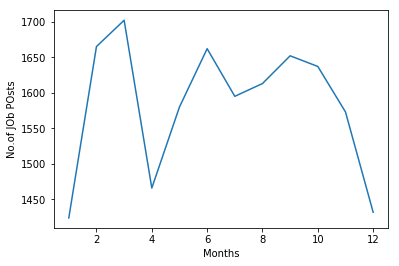

In [164]:
post_over_months = data.groupby(["Month"])[["jobpost"]].count()
plt.plot(post_over_months)
plt.xlabel("Months")
plt.ylabel("No.of JOb POsts")
plt.show()

In [165]:
company_wise_posts = data.groupby(["Company"])[["jobpost"]].count().sort_values(by = "jobpost",ascending = False)[:20]

In [166]:
company_wise_posts

,jobpost
Company,
ArmenTel CJSC,353
World Vision Armenia,239
Mentor Graphics Development Services CJSC,236
Career Center NGO,229
Orange Armenia,203
Ameriabank CJSC,196
Converse Bank CJSC,161
SAS Group LLC,150
UNDP Armenia Office,132


#### Data Preparation

In [167]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [5]:
data.drop(columns=['date','Company','AnnouncementCode','Term','Eligibility','Audience','StartDate','Duration','Location',
                   'Salary','ApplicationP',  'OpeningDate', 'Deadline', 'Notes', 'Attach',  'Month'],axis=1,inplace=True)

In [6]:
data.columns

Index(['jobpost', 'Title', 'JobDescription', 'JobRequirment', 'RequiredQual',
       'AboutC', 'Year', 'IT'],
      dtype='object')

In [170]:
data["jobpost"].nunique()

18892

In [171]:
data["Title"].nunique()

8636

In [67]:
data.drop_duplicates(subset=["jobpost","Title","JobDescription","JobRequirment","RequiredQual"],inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18776 entries, 0 to 19000
Data columns (total 8 columns):
jobpost           18776 non-null object
Title             18776 non-null object
JobDescription    18776 non-null object
JobRequirment     18776 non-null object
RequiredQual      18776 non-null object
AboutC            18776 non-null object
Year              18776 non-null int64
IT                18776 non-null bool
dtypes: bool(1), int64(1), object(6)
memory usage: 1.2+ MB


In [174]:
data.isnull().sum()

jobpost              0
Title               27
JobDescription    3833
JobRequirment     2463
RequiredQual       434
AboutC            6515
Year                 0
IT                   0
dtype: int64

In [175]:
data.isna().sum()

jobpost              0
Title               27
JobDescription    3833
JobRequirment     2463
RequiredQual       434
AboutC            6515
Year                 0
IT                   0
dtype: int64

In [176]:
data.isna().sum()

jobpost              0
Title               27
JobDescription    3833
JobRequirment     2463
RequiredQual       434
AboutC            6515
Year                 0
IT                   0
dtype: int64

In [7]:
import string
import re
import nltk
from nltk.corpus import stopwords

In [8]:
# import spacy
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer


In [9]:
data.head()

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,Year,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,2004,False
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,2004,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,2004,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,2004,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,2004,True


In [10]:
data.dtypes

jobpost           object
Title             object
JobDescription    object
JobRequirment     object
RequiredQual      object
AboutC            object
Year               int64
IT                  bool
dtype: object

In [10]:
data.jobpost

0        AMERIA Investment Consulting Company\nJOB TITL...
1        International Research & Exchanges Board (IREX...
2        Caucasus Environmental NGO Network (CENN)\nJOB...
3        Manoff Group\nJOB TITLE:  BCC Specialist\nPOSI...
4        Yerevan Brandy Company\nJOB TITLE:  Software D...
5        Boutique "Appollo"\nJOB TITLE:  Saleswoman\nPO...
6        OSI Assistance Foundation - Armenian Branch Of...
7        International Research & Exchanges Board (IREX...
8        Yerevan Brandy Company \nJOB TITLE:  Assistant...
9        American Embassy Yerevan\nANNOUNCEMENT NUMBER:...
10       International Research & Exchanges Board (IREX...
11       International Research & Exchanges Board (IREX...
12       Institute for Sustainable Communities (ISC)\nJ...
13       Food Security Regional Cooperation and Stabili...
14       Teleplus LLC\nJOB TITLE:  General Manager\nPOS...
15       NetCall Communications\nJOB TITLE:  Network Ad...
16       SOC.Stockholm\nTITLE:   Utopian World Champion.

In [12]:
data.jobpost[105]

'USAID, DCHA and LWVF\nTITLE:   Annual Program Statement: Implementation and Extension of\nWheelchair Services\nAPS No. M/OP/DCHA/DOFDA-03-1344\nDESCRIPTION:   The United States Government (USG), as represented by the\nUnited States Agency for International Development (USAID), Bureau for\nDemocracy Conflict and Humanitarian Assistance (DCHA), Leahy War Victims\nFund (LWVF) is seeking applications from US and non-US non-profit or\nfor-profit, nongovernmental organizations (NGOs), international\norganizations (IOs), and other qualified non-USG organizations (or\nconsortia) for the implementation and extension of wheelchair services\nfor civilian victims of war and other people with disabilities. This\nprogram is authorized in accordance with the Foreign Assistance Act of\n1961, as amended. Awards shall be made in accordance with 22 CFR 266,\nOMB Circulars A-21 (for universities) or A-122 (for non-profit\norganizations), ADS 303 and USAID Standard Provisions. \nFor more than a decade, th

### Data Cleaning

In [99]:
#Abbrevations and Words correction
def clean_text(text):
    
    text = str(text).lower()
    text = text.strip()
    text = re.sub(r'\S+@\S+','',text)
    text = re.sub(r'\S+\S+@','',text)
    text = re.sub(r'((www\.[^\s]+)|(http?://[^\s]+))','',text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r'\n','',text)
    text = re.sub(r"[-()$\"#;{}`+=~|!'?.:,'0-9']", "", text)
    return(text)

# From the above function , we have handled Newlines, Single Quotes,Digits [0-9],Converted into Lower case.

In [100]:
data.jobpost = data.jobpost.apply(lambda x:clean_text(x))

In [13]:
data.jobpost[107]  

'world vision armeniajob title mobile medical team mmt project managerposition location yerevan armeniajob description world vision armenia encourages strong experiencedand inspired managers in the field of primary health care to apply forthis strategic position that will provide leadership and oversight tothe development and implementation of the mmt project as per therequirements of usaid and world visionrequired qualifications the successful candidate to manage thisproject will demonstrate the following qualifications and competencies medical background and masters degree in public health from recognizeduniversity at least  years of relevant management experience with internationalorganizations proven experience in working with government officials ngos and donoragencies strong skills in management monitoring analyzing and evaluating ofprogrammatic information excellent knowledge of primary health care in armenia previous experience of working in usaid funded grants is a plus proven

In [14]:
data.columns.difference(["Year","IT"])

Index(['AboutC', 'JobDescription', 'JobRequirment', 'RequiredQual', 'Title',
       'jobpost'],
      dtype='object')

In [15]:
for col in data.columns.difference(["Year","IT"]):
    data[col] = data[col].apply(clean_text)

In [16]:
data.JobDescription

0        ameria investment consulting company is seekin...
1                                                      nan
2        public outreach and strengthening of a growing...
3        the lead local enhancement and development for...
4                                                      nan
5            saleswoman will sell menswear and accessories
6        the armenian branch office of the open society...
7                                                      nan
8                                                      nan
9        the incumbent assists in coordinating inlfunde...
10                                                     nan
11                                                     nan
12       isc seeks an experienced and creative chief of...
13       food security regional cooperation and stabili...
14                                                     nan
15                                                     nan
16                                                     n

In [17]:
data.RequiredQual

0        to perform this job successfully anindividual ...
1         bachelors degree masters is preferred excelle...
2         degree in environmentally related field or  y...
3         advanced degree in public health social scien...
4         university degree economical background is a ...
5         candidates should be female  years old nicelo...
6         university degree in finance/ accounting  one...
7                                                      nan
8         university degree at least  years of experien...
9        note all applicants are instructed toaddress e...
10                                                     nan
11                                                     nan
12        masters degree with minimum of seven years of...
13        higher education and/or professional experien...
14        degree in business administration or technolo...
15        excellent knowledge of windows  server linux ...
16                                                     n

In [18]:
data.head()

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,Year,IT
0,ameria investment consulting companyjob title ...,chief financial officer,ameria investment consulting company is seekin...,supervises financial management and administr...,to perform this job successfully anindividual ...,nan,2004,False
1,international research & exchanges board irext...,fulltime community connections intern paid int...,nan,nan,bachelors degree masters is preferred excelle...,the international research & exchanges board i...,2004,False
2,caucasus environmental ngo network cennjob tit...,country coordinator,public outreach and strengthening of a growing...,working with the country director to provide ...,degree in environmentally related field or y...,the caucasus environmental ngo network is anon...,2004,False
3,manoff groupjob title bcc specialistposition l...,bcc specialist,the lead local enhancement and development for...,identify gaps in knowledge and overseeing inf...,advanced degree in public health social scien...,nan,2004,False
4,yerevan brandy companyjob title software devel...,software developer,nan,rendering technical assistance to database ma...,university degree economical background is a ...,nan,2004,True


In [19]:
from nltk.corpus import stopwords

In [101]:
stop = []
stop = (stopwords.words('english'))


In [102]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
stop_list = ['armenian','armenia','job','title','position','location','responsibilities','application','applications'
                  'procedures','deadline','required','qualifications','renumeration','salary','date','company','llc',
            'qualification','Thanks','Sorry','Please','careercenteram','website','email']

In [104]:
stop.extend(stop_list)

In [105]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
from textblob import TextBlob
from textblob import Word

#### Stopword Removal

In [235]:
data.jobpost = data.jobpost.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words

In [236]:
data.jobpost[5]

'boutique appollojob saleswomanposition yerevan armeniawork hours free weekjob description saleswoman sell menswear accessoriesrequired candidates female years nicelooking exterior excellent communication skills fluency russian good knowledge english oralremuneration starting amdapplication procedures information please contact irinanalbandyan please clearly mention letter learned ofthis opportunity career center mention itswebsite thanksapplication february place free posting career related opportunities inyour organization'

#### Ignoring words which are less than or equal to 3 in length

In [237]:
data.jobpost = data.jobpost.apply(lambda x:re.sub(r'\W*\b\w{1,3}\b','',x))

In [238]:
data.jobpost[105]

'usaid dcha lwvftitle annual program statement implementation extension ofwheelchair servicesaps/dcha/dofdadescription united states government represented theunited states agency international development usaid bureau fordemocracy conflict humanitarian assistance dcha leahy victimsfund lwvf seeking applications nonus nonprofit orforprofit nongovernmental organizations ngos internationalorganizations qualified nonusg organizations orconsortia implementation extension wheelchair servicesfor civilian victims people disabilities thisprogram authorized accordance foreign assistance amended awards shall made accordance circulars universities nonprofitorganizations usaid standard provisions decade maintained primary objective ofexpanding access affordable appropriate prosthetic orthoticservices although much work remains improve quality expand theavailability reduce costs prosthetic services fund isincreasing involvement response challenges theoverwhelming needs persons requiring wheelchairs

In [239]:
data.jobpost = data.jobpost.apply(lambda x: re.sub("  "," ", x)) # Replacing double space with single space

In [243]:
len(data.jobpost[105])  # Before pos_tagging 

17603

In [244]:
data.jobpost = data.jobpost.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS']))

In [245]:
len(data.jobpost[105]) # After pos_tagging and removing Nouns from the collection.

8395

In [246]:
len(data.jobpost[107])

914

In [247]:
data.jobpost = data.jobpost.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [248]:
len(data.jobpost[105])

8375

In [249]:
len(data.jobpost[107])

913

In [29]:
from nltk.stem import  PorterStemmer

In [263]:
data.jobpost = data.jobpost.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) 

In [264]:
len(data.jobpost[105])

7042

In [265]:
len(data.jobpost[107])

780

In [250]:
from sklearn.model_selection import train_test_split

In [266]:
X_train,X_test,y_train,y_test = train_test_split(data.jobpost,data.IT,test_size=0.3,random_state=52)

In [267]:
X_train.head()

3122     cc_rd_term full assum therefor femal encourag ...
16406    damari llctitl armeniajob look qualifi enginee...
5680     cjsctitl senior armeniajob seek senior updat p...
15443    ngotitl receptionist/ administr everyonestart ...
2980     armeniatitl programm armeniajob incumb provid ...
Name: jobpost, dtype: object

In [268]:
X_test.head()

15703    yerevan municipalitytitl institut armeniajob i...
132      valensia & & armeniajob & look main amountof c...
13200    univers cjsctitl artikopen/ interest long arti...
11132    young programopen/ qualifi interest candidates...
15010    seven llctitl senior long armeniajob seven loo...
Name: jobpost, dtype: object

In [269]:
y_train.head()

3122     False
16406    False
5680     False
15443    False
2980     False
Name: IT, dtype: bool

In [270]:
X_train.shape

(13224,)

In [271]:
X_test.shape

(5668,)

In [272]:
y_train.shape

(13224,)

In [273]:
y_test.shape

(5668,)

### After all the Data Preparation Steps ,Feature Engineering / Terms Reduction

In [21]:
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [275]:
#Train Data
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=1000)
xtrain_count = count_vect.fit_transform(X_train)

In [276]:
count_vect.get_feature_names()

['abl',
 'abovyan',
 'abroad',
 'academ',
 'acca',
 'accept',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accountantterm',
 'accur',
 'acdi',
 'achiev',
 'acov',
 'acquir',
 'across',
 'act',
 'activ',
 'activitiesrequir',
 'actual',
 'adamyan',
 'adapt',
 'addit',
 'address',
 'adequ',
 'adetail',
 'adher',
 'administ',
 'administr',
 'adopt',
 'advanc',
 'advantag',
 'advertis',
 'advis',
 'advisori',
 'advocaci',
 'affect',
 'affili',
 'agil',
 'agre',
 'agribusi',
 'agricultur',
 'aharonyan',
 'aim',
 'ajax',
 'ajob',
 'algorithm',
 'align',
 'along',
 'alreadi',
 'also',
 'altern',
 'ameriabank',
 'american',
 'among',
 'analys',
 'analysi',
 'analyt',
 'analyz',
 'andarmenian',
 'anddevelop',
 'andenglish',
 'andintern',
 'andoth',
 'andprevail',
 'andprocedur',
 'andprofession',
 'android',
 'andrussian',
 'andth',
 'annual',
 'anoth',
 'answer',
 'aplu',
 'appli',
 'applic',
 'appropri',
 'approv',
 'april',
 'architectur',
 'archiv',
 'areappli',
 'areencourag',
 'ar

In [277]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

In [278]:
#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [279]:
dtm = pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
dtm

,abl,abovyan,abroad,academ,acca,accept,accompani,accomplish,accord,account,...,withth,work,workshop,worldto,worldwid,would,write,written,yerevan,young
0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.084265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.072731,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.049742,0.000000,0.000000,0.000000,0.000000,0.000000,0.140016,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.041430,0.000000,0.000000,0.000000,0.000000,0.070072,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.064418,...,0.0,0.030979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058668,0.000000
6,0.061474,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.070654,0.000000,0.000000,0.077116,0.000000,0.039833,0.066293,0.000000,0.000000
7,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.040600,0.000000,0.000000,0.000000,0.000000,0.068669,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120371,0.000000,0.284359
9,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.225587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213604,0.000000


In [280]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), max_features=1000)
tfidf_vect_ngram.fit(data['jobpost'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [281]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=1000)
tfidf_vect_ngram_chars.fit(data['jobpost'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

### Function defined for Building Model on the Train data and then making Predictions on the Testing Data.
### We have used these Techniues :
### 1. Naive Bayes
### 2. Logistic Regression
### 3. LInear Support Vector CLassifier

In [294]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)   # X_train,y_train
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)  # X_test
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    
    return(metrics.classification_report(predictions, valid_y))  # X_test,y_test
    #classif_report = (metrics.classification_report(predictions,valid_y))
          

### Naive BAyes (Gave Highest Recall value with Bigrams)

In [296]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors:\n ", accuracy_L1)



# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF:\n ", accuracy_L1)



# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors:\n ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors:\n ", accuracy_L1)


NB  for L1, Count Vectors:
                precision    recall  f1-score   support

       False       0.95      0.93      0.94      4598
        True       0.72      0.78      0.75      1070

   micro avg       0.90      0.90      0.90      5668
   macro avg       0.83      0.85      0.84      5668
weighted avg       0.90      0.90      0.90      5668

NB  for L1, WordLevel TF-IDF:
                precision    recall  f1-score   support

       False       0.89      0.96      0.93      4198
        True       0.86      0.68      0.76      1470

   micro avg       0.89      0.89      0.89      5668
   macro avg       0.88      0.82      0.84      5668
weighted avg       0.88      0.89      0.88      5668

NB  for L1, N-Gram Vectors:
                precision    recall  f1-score   support

       False       0.95      0.93      0.94      4633
        True       0.71      0.79      0.75      1035

   micro avg       0.90      0.90      0.90      5668
   macro avg       0.83      0.86    

### LOgistic Regression (Gave Highest Recall value with Count Vectorizers as well as BIgrams)

In [297]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors:\n ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF:\n ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors:\n ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors:\n ", accuracy_L1)

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR  for L1, Count Vectors:
                precision    recall  f1-score   support

       False       0.97      0.93      0.95      4703
        True       0.72      0.87      0.79       965

   micro avg       0.92      0.92      0.92      5668
   macro avg       0.85      0.90      0.87      5668
weighted avg       0.93      0.92      0.92      5668

LR  for L1, WordLevel TF-IDF:
                precision    recall  f1-score   support

       False       0.96      0.94      0.95      4625
        True       0.75      0.83      0.79      1043

   micro avg       0.92      0.92      0.92      5668
   macro avg       0.85      0.88      0.87      5668
weighted avg       0.92      0.92      0.92      5668

LR  for L1, N-Gram Vectors:
                precision    recall  f1-score   support

       False       0.97      0.93      0.95      4728
        True       0.71      0.88      0.78       940

   micro avg       0.92      0.92      0.92      5668
   macro avg       0.84      0.90    

### Linear SVC (Gave high Recall Values with Count Vectorizers)

In [299]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors:\n ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF:\n ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors:\n ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors:\n ", accuracy_L1)

SVC  for L1, Count Vectors:
                precision    recall  f1-score   support

       False       0.97      0.94      0.95      4648
        True       0.76      0.87      0.81      1020

   micro avg       0.93      0.93      0.93      5668
   macro avg       0.87      0.90      0.88      5668
weighted avg       0.93      0.93      0.93      5668



C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC  for L1, WordLevel TF-IDF:
                precision    recall  f1-score   support

       False       0.96      0.93      0.95      4620
        True       0.74      0.82      0.78      1048

   micro avg       0.91      0.91      0.91      5668
   macro avg       0.85      0.88      0.86      5668
weighted avg       0.92      0.91      0.91      5668

SVC  for L1, N-Gram Vectors:
                precision    recall  f1-score   support

       False       0.97      0.93      0.95      4674
        True       0.74      0.86      0.79       994

   micro avg       0.92      0.92      0.92      5668
   macro avg       0.85      0.90      0.87      5668
weighted avg       0.93      0.92      0.92      5668

SVC for L1, CharLevel Vectors:
                precision    recall  f1-score   support

       False       0.97      0.92      0.94      4788
        True       0.65      0.86      0.74       880

   micro avg       0.91      0.91      0.91      5668
   macro avg       0.81      0.